<a href="https://colab.research.google.com/github/calzateu/Numerical_Analysis/blob/main/code/Sentiment_analysis/Logistic_regression_new_videos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('Dataset-with-sentiments.csv')

In [3]:
sum(data['stop_comments'].isnull())

2

In [4]:
data = data[data['stop_comments'].notnull()]

In [5]:
sum(data['stop_comments'].isnull())

0

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train,X_test,y_train,y_test = train_test_split(data['stop_comments'],data['pol_cat'],test_size = 0.2,random_state = 324)

In [8]:
X_train.shape

(1801,)

In [9]:
X_test.shape

(451,)

In [10]:
data['pol_cat'].value_counts()

1    1217
0    1035
Name: pol_cat, dtype: int64

## **Gonna Apply Logistic Regression**

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

In [12]:
#from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer 
#vect = CountVectorizer()
#tf_train = vect.fit_transform(X_train)
#tf_test = vect.transform(X_test)

In [13]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer 
vect = TfidfVectorizer()
tf_train = vect.fit_transform(X_train)
tf_test = vect.transform(X_test)

In [14]:
tf_train

<1801x3368 sparse matrix of type '<class 'numpy.float64'>'
	with 15902 stored elements in Compressed Sparse Row format>

In [15]:
tf_train.toarray()[0].sum()

1.229369476824565

In [16]:
#vect?

In [17]:
#vect.get_feature_names()

In [18]:
#X_train[0]

In [19]:
#for i in tf_train.toarray()[0]:
#  if (i != 0):
#    print(i)

In [20]:
tf_train.shape

(1801, 3368)

**Print the Vocabulary**

In [21]:
#print(vect.vocabulary_)

In [22]:
#vocab = vect.vocabulary_

In [23]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(tf_train,y_train)

LogisticRegression()

**Accuracy score on training dataset**

In [24]:
lr.score(tf_train,y_train)

0.9555802332037757

**Accuracy score on test dataset i.e got from the splitting**

In [25]:
lr.score(tf_test,y_test)

0.8824833702882483

**Make predictions on the test dataset i.e. unseen data to the model**

In [26]:
expected = y_test
predicted = lr.predict(tf_test)

**plot confusion matrix for the test dataset**

In [27]:
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

from sklearn import metrics

In [28]:
pip install mlxtend

[[202   0]
 [  0   0]]


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/plot_confusion_matrix.py:59: RuntimeWarning: invalid value encountered in true_divide
  normed_conf_mat = conf_mat.astype('float') / total_samples


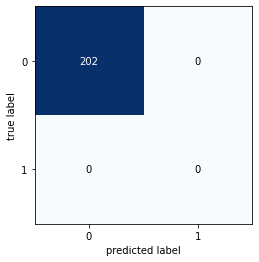

In [29]:
cf = metrics.confusion_matrix(expected,predicted,labels = [1,-1])
print(cf)
## this command is only for google collab 
## in the below figure " 1 is actually showing -1 and 0 is actually showing 1"
fig, ax = plot_confusion_matrix(conf_mat = cf)
                                
## It canbe used in any platform
# fig, ax = plot_confusion_matrix(conf_mat = cf, class_names = [1,-1])
plt.show()

In [30]:
from sklearn import metrics
print(metrics.classification_report(expected, predicted))
# print(metrics.confusion_matrix(expected,predicted))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88       215
           1       0.91      0.86      0.88       236

    accuracy                           0.88       451
   macro avg       0.88      0.88      0.88       451
weighted avg       0.88      0.88      0.88       451



**find the F1 score**

In [31]:
from sklearn.metrics import f1_score
f1_score(expected, predicted, average='macro')

0.8824625673050919

# **Test the model with the comments of the other video**

In [32]:
data_test = pd.read_csv('Video_2/Dataset-with-sentiments.csv')

In [33]:
sum(data_test['stop_comments'].isnull())

0

In [34]:
data_test = data_test[data_test['stop_comments'].notnull()]

In [35]:
sum(data_test['stop_comments'].isnull())

0

In [36]:
data_test['pol_cat'].value_counts()

1    738
0    738
Name: pol_cat, dtype: int64

In [37]:
tf_test = vect.transform(data_test['stop_comments'])

In [38]:
tf_test

<1476x3368 sparse matrix of type '<class 'numpy.float64'>'
	with 8985 stored elements in Compressed Sparse Row format>

In [39]:
tf_test.toarray()[0].sum()

2.218952813335892

In [40]:
tf_train.toarray().shape

(1801, 3368)

In [41]:
tf_test.toarray().shape

(1476, 3368)

In [42]:
lr.score(tf_test, data_test['pol_cat'])

0.8631436314363143